<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Need)</span></div>

In [ ]:
conda install matplotlib -c conda-forge

In [44]:
from matplotlib import pyplot as plt
import numpy as np

# Chapter Summary

# 1 A simple plot

## 1.1 Let’s look at some code.

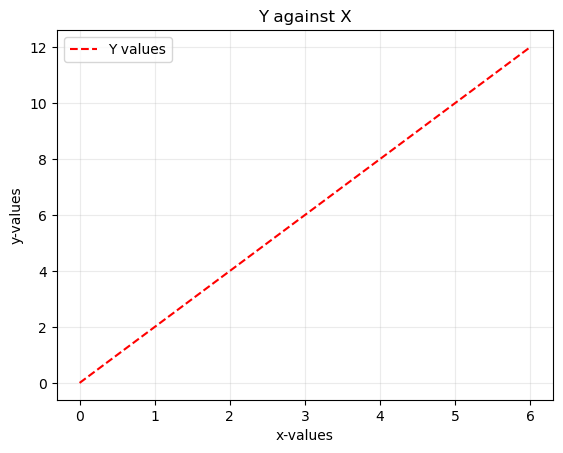

In [30]:
# some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

# start plotting
plt.plot(x, y_1, label='Y values', color='red', linestyle='dashed')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Y against X')
plt.grid(alpha=.25)
plt.legend(loc='upper left')
plt.show()

### Things to note

1. **abbreviation**

|Long form|Abbreviation|
|---|---|
|`color`|`c`|
|`linestyle`|`ls`|
|`linewidth`|`lw`|

In [ ]:
# the following lines produce the same result
plt.plot(x, y, color='red', linestyle='dashed', linewidth=2)
plt.plot(x, y, c='red', ls='dashed', lw=2)

2. **use `plt.show()`**  
jupyter is interactive, need to use `plt.show()` if the script is run directly from the command line

3. **default**
plotting functions have dafault values for styling parameters, can plot simply using:

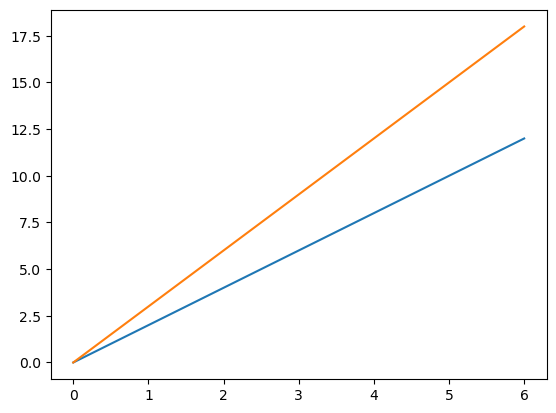

In [26]:
plt.plot(x, y_1, y_2)

4. **readability**  
can split the arguments into separate lines to improve readability

In [ ]:
# both forms are accpetable
plt.plot(x, y, color='red', linestyle='dashed', linewidth=2)
plt.plot(x, y_1, label='Y values',
           color='red', linestyle='dashed')

5. **order doesn't matter**  
order of how you specify the keyword arguments (`color`, `linewidth`, …) does not matter

## 1.2 Adding another plot

use `plot` command to add `y_2` by adding the following line:  
**!!!** notice how `plt.legend()` need to be below the two `plt.plot()` to show both legends

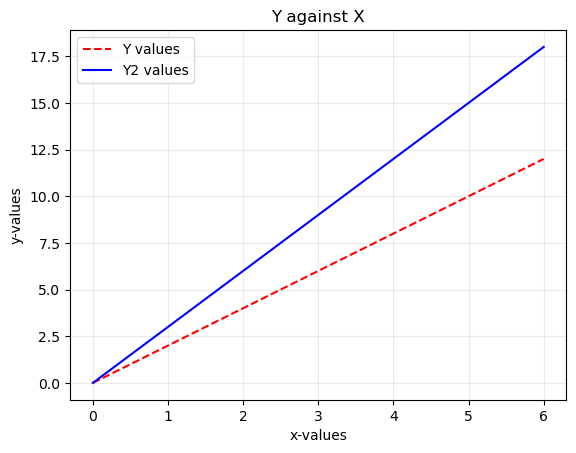

In [32]:
plt.plot(x, y_1, label='Y values', color='red', linestyle='dashed')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Y against X')
plt.grid(alpha=.25)

# adding another plot
plt.plot(x, y_2, label='Y2 values', color='blue')
plt.legend(loc='upper left')
plt.show()

## 1.3 Yet another plot but with error bars

`errorbar()` to include $x$ and $y$ error bars for the points

In [ ]:
plt.errorbar(x, y_3,
             xerr=x_error, yerr=y_error,
             label="Y3 with errors",
             color="green")

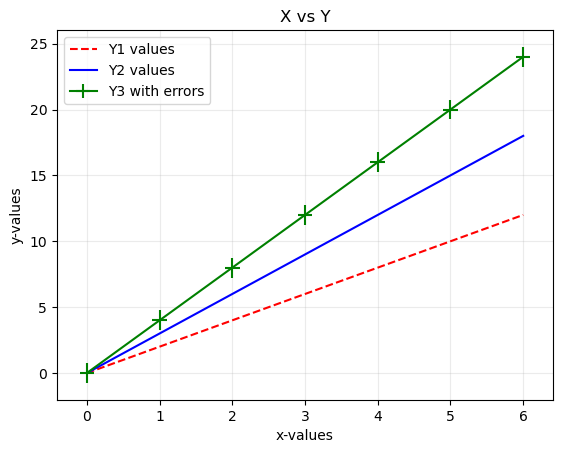

In [38]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]
y_3 = [0, 4, 8, 12, 16, 20, 24]
x_error, y_error = .1, .75

# Lets start plotting
plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed',)
plt.plot(x, y_2, label='Y2 values', color='blue', )
plt.errorbar(x, y_3, xerr=x_error, yerr=y_error,
             label='Y3 with errors', color='green')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

the example above provides constant errors for all the points, but can also provide a **list of errors** so each will have a different length

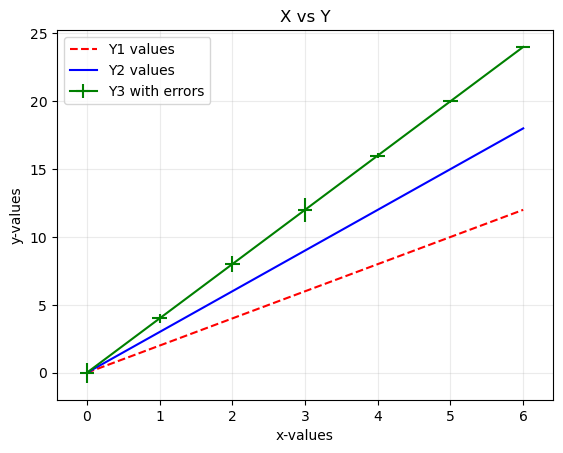

In [42]:
# example list of errors
y_error = [0.75, 0.3, 0.6, 0.9, 0.2, 0.1, 0]

# Lets start plotting
plt.plot(x, y_1, label='Y1 values', color='red', linestyle='dashed',)
plt.plot(x, y_2, label='Y2 values', color='blue', )
plt.errorbar(x, y_3, xerr=x_error, yerr=y_error,
             label='Y3 with errors', color='green')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper left')

# 2 Better with NumPy

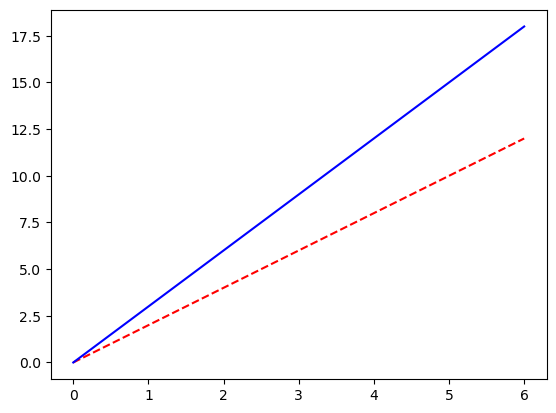

In [45]:
# Some data for plotting
x = [0, 1, 2, 3, 4, 5, 6]
y_1 = [0, 2, 4, 6, 8, 10, 12]
y_2 = [0, 3, 6, 9, 12, 15, 18]

np_x = np.array(x)
np_y_1 = np.array(y_1)
np_y_2 = np.array(y_2)

plt.plot(np_x, np_y_1, color='red', linestyle='dashed', label='Y values')
plt.plot(np_x, np_y_2, color='blue', label='Y2 values')

## 2.1 Adding mathematical functions

Numpy arrays can generate data-related **mathematical functions** easily  
e.g. using the previous code to plot $x^2$ and $sin(x)$

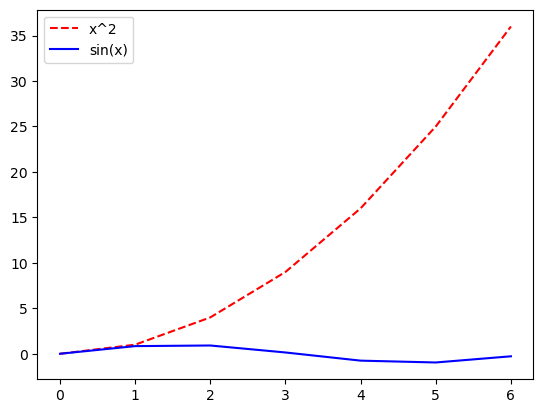

In [46]:
x = np.array([0, 1, 2, 3, 4, 5, 6])

x2 = x**2                  # The math stuff
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed', )
plt.plot(x, sin_x, label='sin(x)',
         color='blue')
plt.legend()                                 

BUT the plot does not look good because $sin(x)$ lies between $\pm1$, but $x^2$ has no such bounds.  
One way to fix this is to **add another y-axis** that shares the same x-axis.

## We need another axis!

`twinx()` create another y-axis that shares the same x-axis

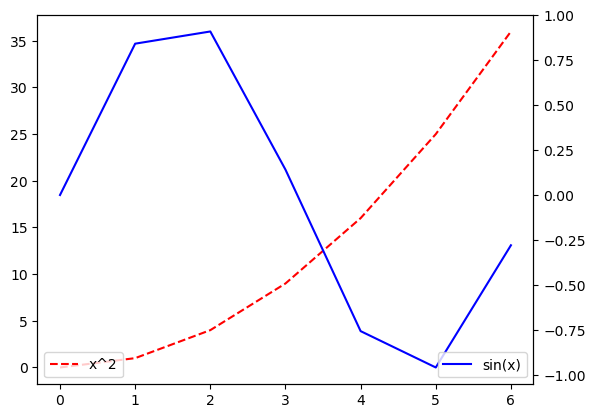

In [47]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2

the plot doesn't look good $\because$ only have a few points, use `np.linspace` to fix:  
**!!!** note how there're two `legend()` now

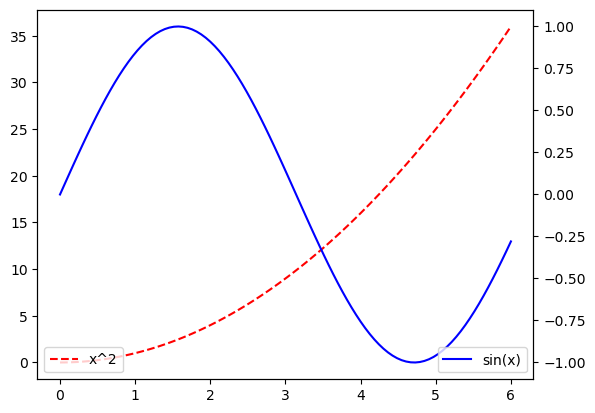

In [54]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
x = np.linspace(0, 6, 100)                 # to plot a smooth curve
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',color='red', linestyle='dashed')
plt.legend(loc='lower left')                                  # For y-axis 1

plt.twinx()                                                   # This creates a new y-axis 
                                                              # for the plots that comes after
plt.plot(x, sin_x, label='sin(x)',color='blue', )
plt.legend(loc='lower right')                                 # For y-axis 2


# 3 Saving to disc

Matplotlib can export plots into many formts (PDF, JPEG, PNG, BMP, etc) and at different resolution  
- use `savefig()`
- specify the format with the extension (e.g. `filename.pdf`)\
- specify the resolution using dots-per-inch `dpi`  

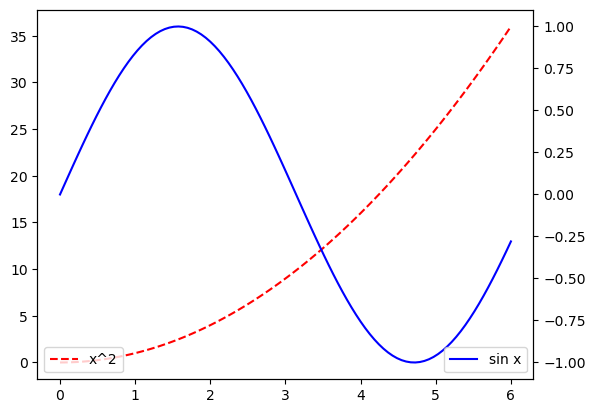

In [55]:
x = np.linspace(0, 6, 100)
x2 = x**2
sin_x = np.sin(x)

plt.plot(x, x2, label='x^2',
         color='red', linestyle='dashed')
plt.legend(loc='lower left')
plt.twinx()
plt.plot(x, sin_x,
         label='sin x', color='blue')
plt.legend(loc='lower right')

plt.savefig('simple-plot.png', dpi=150)

**!!!** note the file is saved in the **same directory** as the one where my notebook is, to save it elsewhere, specify the path in more details:

In [ ]:
plt.savefig('C:\\Desktop\simple-plot.png', dpi=150)

# 4 A real example: Global Warming

## 4.1 Plotting data from files

plotting data stored in a file (e.g. spreadsheet, text file, database)  

example: Earth’s land temperature data from the [Berkeley Earth website](https://berkeleyearth.org/), average temperature data for Daily Land  
**!!!** a small alpha value to soften the plot colour, `plt.ylim()` to make the plot range symmetrical in the $y$ direction

(-3.2, 3.2)

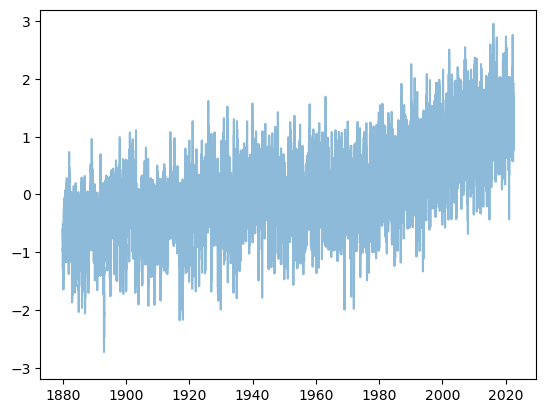

In [66]:
data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=24)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.ylim([-3.2, 3.2])

add a horizontal line at the zero value to highlight the trend shown by the data  
`hlines()` needs a $y$-value and starting and ending values for $x$

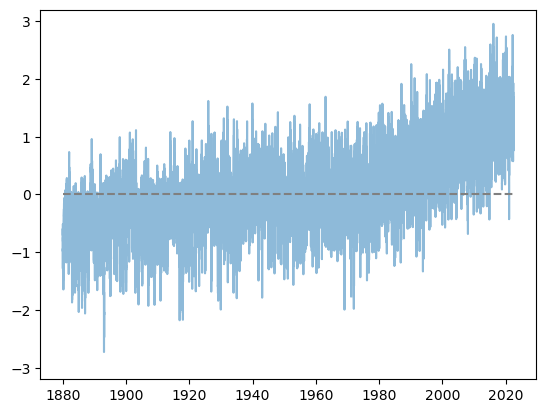

In [69]:
data = np.loadtxt('Complete_TAVG_daily.txt',
                   skiprows=24)
date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.ylim([-3.2, 3.2])

# add a horizontal line at zero
plt.hlines(0, date[0], date[-1], linestyle='--', colors='grey')

## 4.2 Styles

check out Matplotlib's [standard style templates](http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)!!  
**!!!** the line must be included right at the top  
example below is **fivethirtyeight**

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

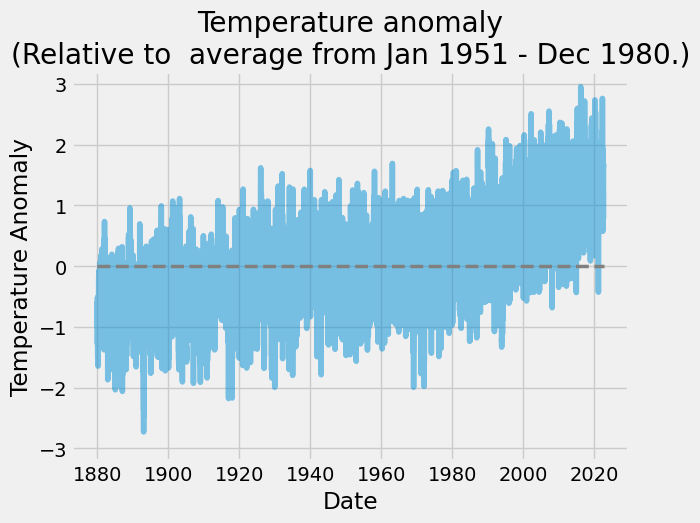

In [88]:
plt.style.use('fivethirtyeight')

data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', lw=2.5, colors='grey')
plt.ylim([-3.2, 3.2])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

### xkcd!

try xkcd style haha  
run `plt.xkcd()` instead of setting a style

Text(0.5, 1.0, 'Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

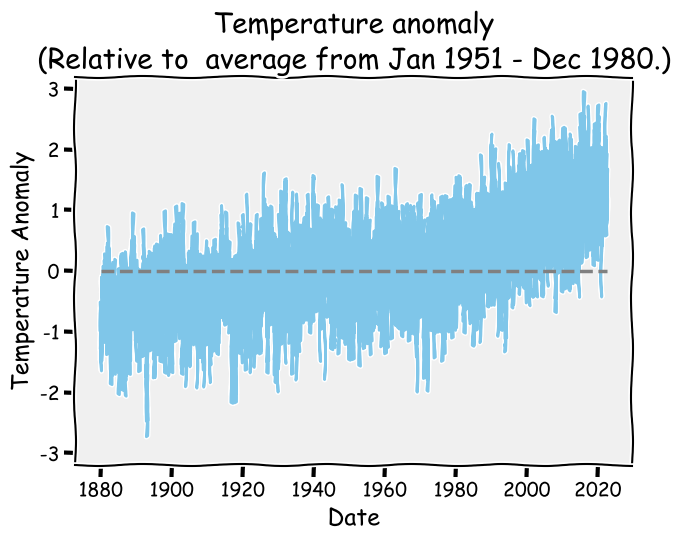

In [84]:
plt.xkcd()
data = np.loadtxt('Complete_TAVG_daily.txt', skiprows=24)

date = data[:, 0]
anomaly = data[:, -1]

plt.plot(date, anomaly, alpha=.5)
plt.hlines(0, date[0], date[-1], linestyle='--', lw=2.5, colors='grey')
plt.ylim([-3.2, 3.2])

plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature anomaly\n(Relative to  average from Jan 1951 - Dec 1980.)')

QUESTION: aaahhh why is there so many 'findfont'? Do I need to download Comic Neue? But the plot is still generated below

### Resetting styles

to reset things and jump out of this style, set the default style using:

In [89]:
plt.style.use('default')